In [1]:
%matplotlib inline

import pandas as pd # manipulate dataframes
import matplotlib.pyplot as plt # plotting
import matplotlib, torch, time, h5py
import numpy as np

from sklearn.metrics import mean_squared_error

import neuravi

import structupy as spy
import viscopy as vp

device = torch.device('cpu') #get_default_device()
print(device)

import mpltern
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

ModuleNotFoundError: No module named 'neuravi'

In [ ]:
class models:
    """custom global model predictions

    """
    def __init__(self, path, name_models, device):
        
        self.device = device
        self.n_models = len(name_models)
        self.models = [None for _ in range(self.n_models)]
        
        for i in range(self.n_models):
            name = name_models[i]
            
            # Extract arch
            nb_layers = int(name[name.find("l")+1:name.find("_n")])
            nb_neurons = int(name[name.find("n")+1:name.rfind("_p")])
            p_drop = float(name[name.find("p")+1:name.rfind(".")])
            
            self.models[i] = neuravi.model(4,nb_neurons,nb_layers,ds.nb_channels_raman,p_drop=p_drop) 
            self.models[i].load_state_dict(torch.load(path+name,map_location='cpu'))
            self.models[i].eval()
            
    def predict(self,method,X, T=[1000.0], lbd= [500.0]):
        
        X = torch.Tensor(X).to(self.device)
        T = torch.Tensor(T).to(self.device)
        lbd = torch.Tensor(lbd).to(self.device)
        
        if method == "raman_pred":    
            out = np.zeros((len(X),850,self.n_models)) # problem is defined with a X raman shift of 850 values
            for i in range(self.n_models):
                out[:,:,i] = getattr(self.models[i],method)(X).cpu().detach().numpy()
            return out
        else:
            out = np.zeros((len(X),self.n_models))
            
        if method in frozenset(('ag', 'myega', 'am', 'cg', 'tvf')):
            for i in range(self.n_models):
                out[:,i] = getattr(self.models[i],method)(X,T).cpu().detach().numpy().reshape(-1)
        elif method == "sellmeier":
            for i in range(self.n_models):
                out[:,i] = getattr(self.models[i],method)(X,lbd).cpu().detach().numpy().reshape(-1)           
        else:
            for i in range(self.n_models):
                out[:,i] = getattr(self.models[i],method)(X).cpu().detach().numpy().reshape(-1)
        
        return out
                    

In [7]:
path = "./model/best/"
name_list = pd.read_csv("./model/best/best_list.csv").loc[:,"name"]
neuralmodel = models(path, name_list, device)

FileNotFoundError: [Errno 2] File b'./model/best/best_list.csv' does not exist: b'./model/best/best_list.csv'

In [6]:
X_6010 = np.array([[60,10,0,30]]).T
X_6010.shape

T_6010 = np.arange(500,2000,1.0)

n_6010 = neuralmodel.predict("ag",X_6010,T_6010).mean(axis=1)

NameError: name 'neuralmodel' is not defined

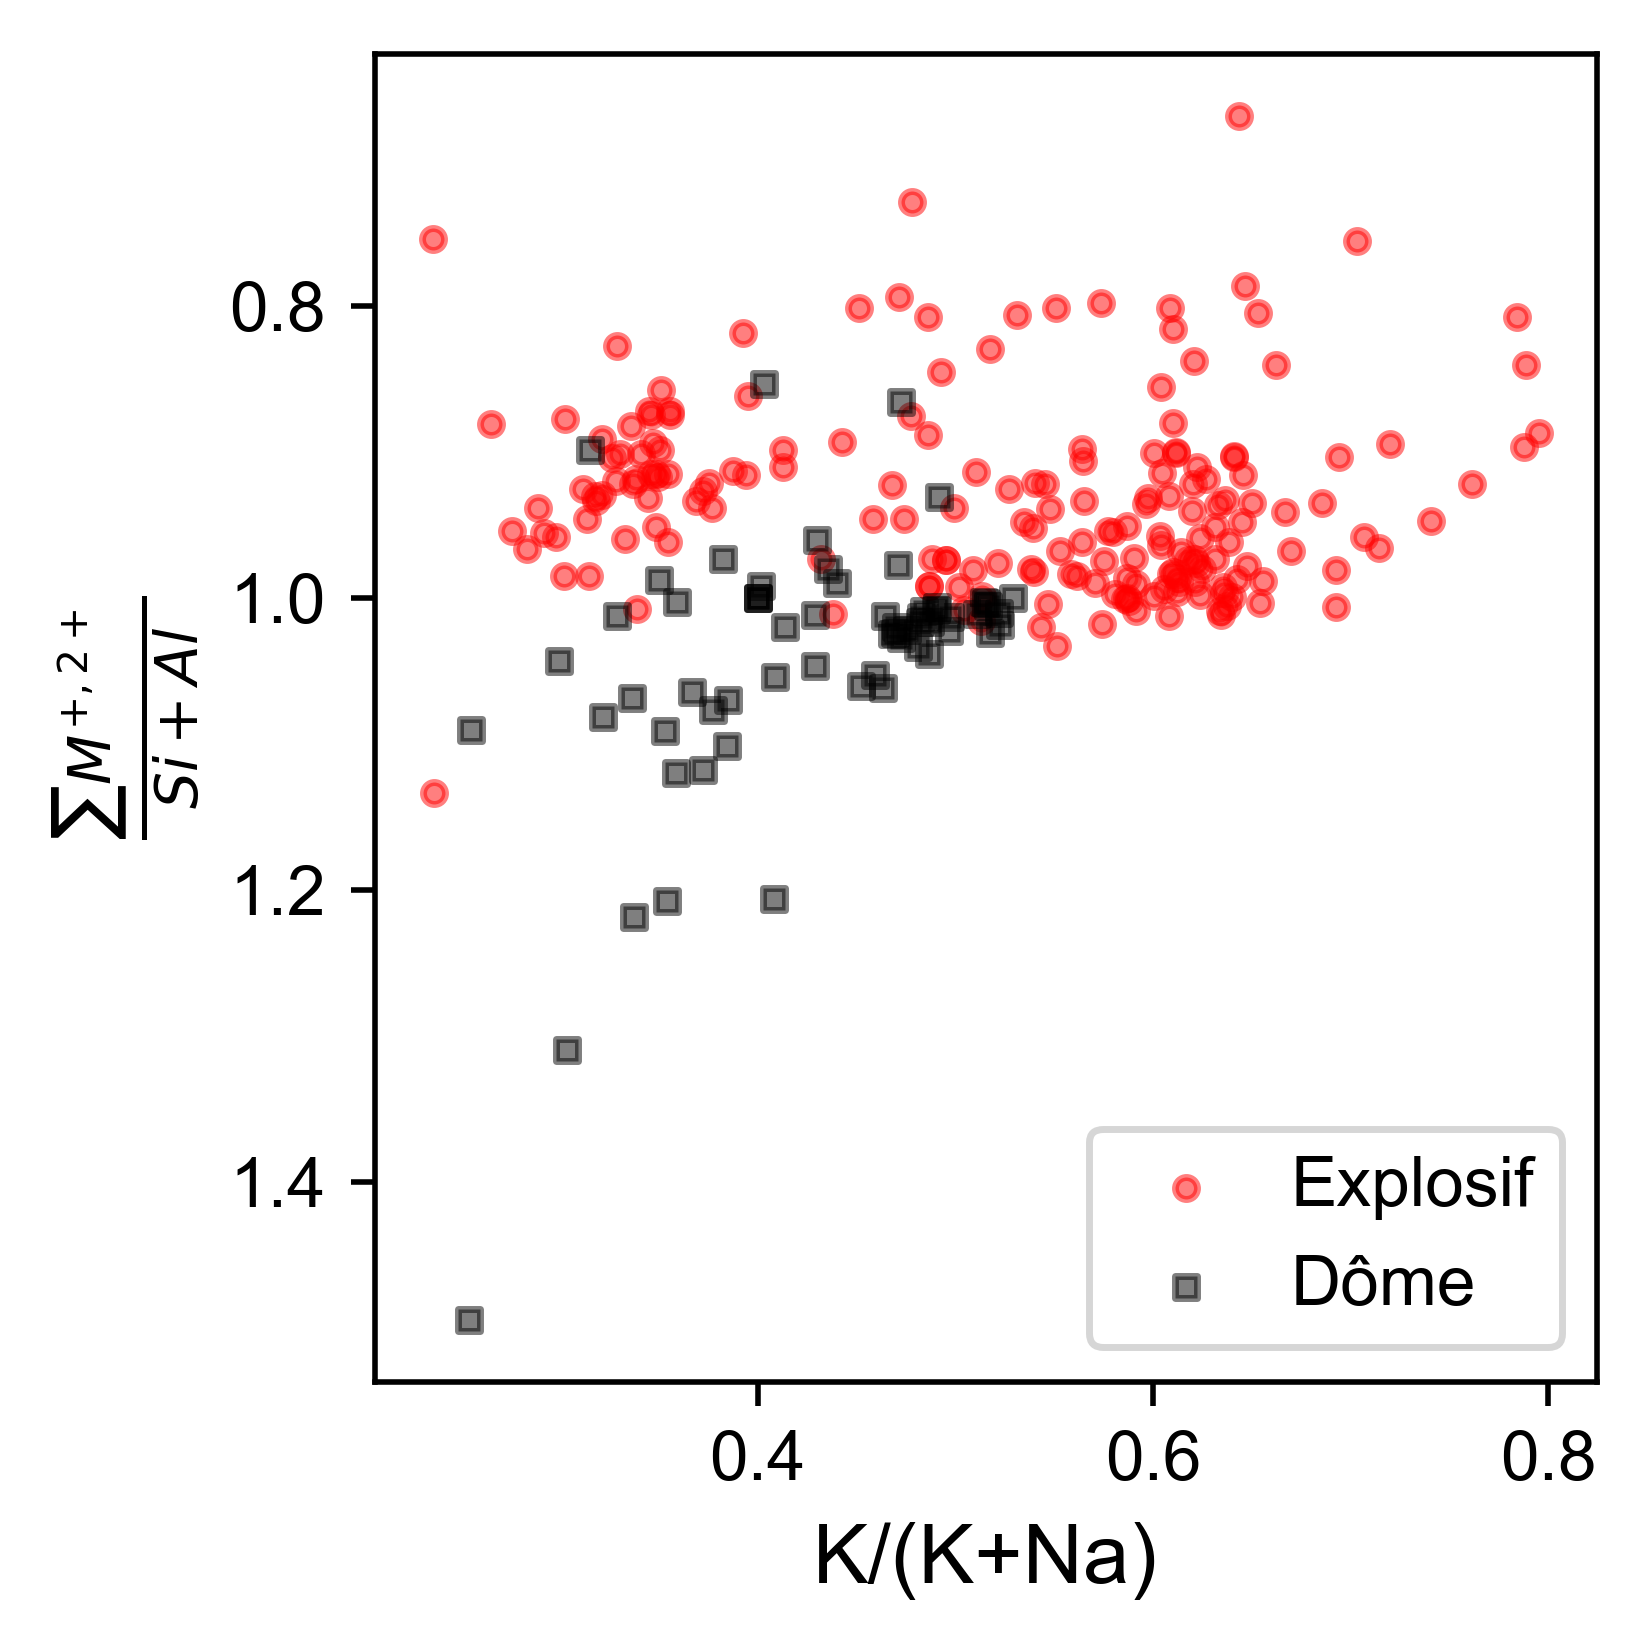

In [10]:
# Pour presentation
plt.figure(figsize=(3.4,3.4),dpi=500)
plt.scatter(dataset.loc[dataset["Explo"]==1,"K#"],np.abs(dataset.loc[dataset["Explo"]==1,"RAI"]),c='r',marker="o",s=10,alpha=0.5,label="Explosif")
plt.scatter(dataset.loc[dataset["Explo"]==0,"K#"],np.abs(dataset.loc[dataset["Explo"]==0,"RAI"]),c='k',marker="s",s=10,alpha=0.5,label="Dôme")
plt.legend()
plt.xlabel(r"K/(K+Na)")
plt.ylabel(r"$\frac{\sum{M^{+,2+}}}{Si+Al}$")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('RAI_XK.png')

In [28]:

data_all = dataset.loc[:,"h2o"].dropna()
from scipy.stats import ttest_ind

# compare samples
stat, p = ttest_ind(data_all.loc[dataset["Explo"]==0], data_all.loc[dataset["Explo"]==1])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')
    

Statistics=-22.844, p=0.000
Different distributions (reject H0)


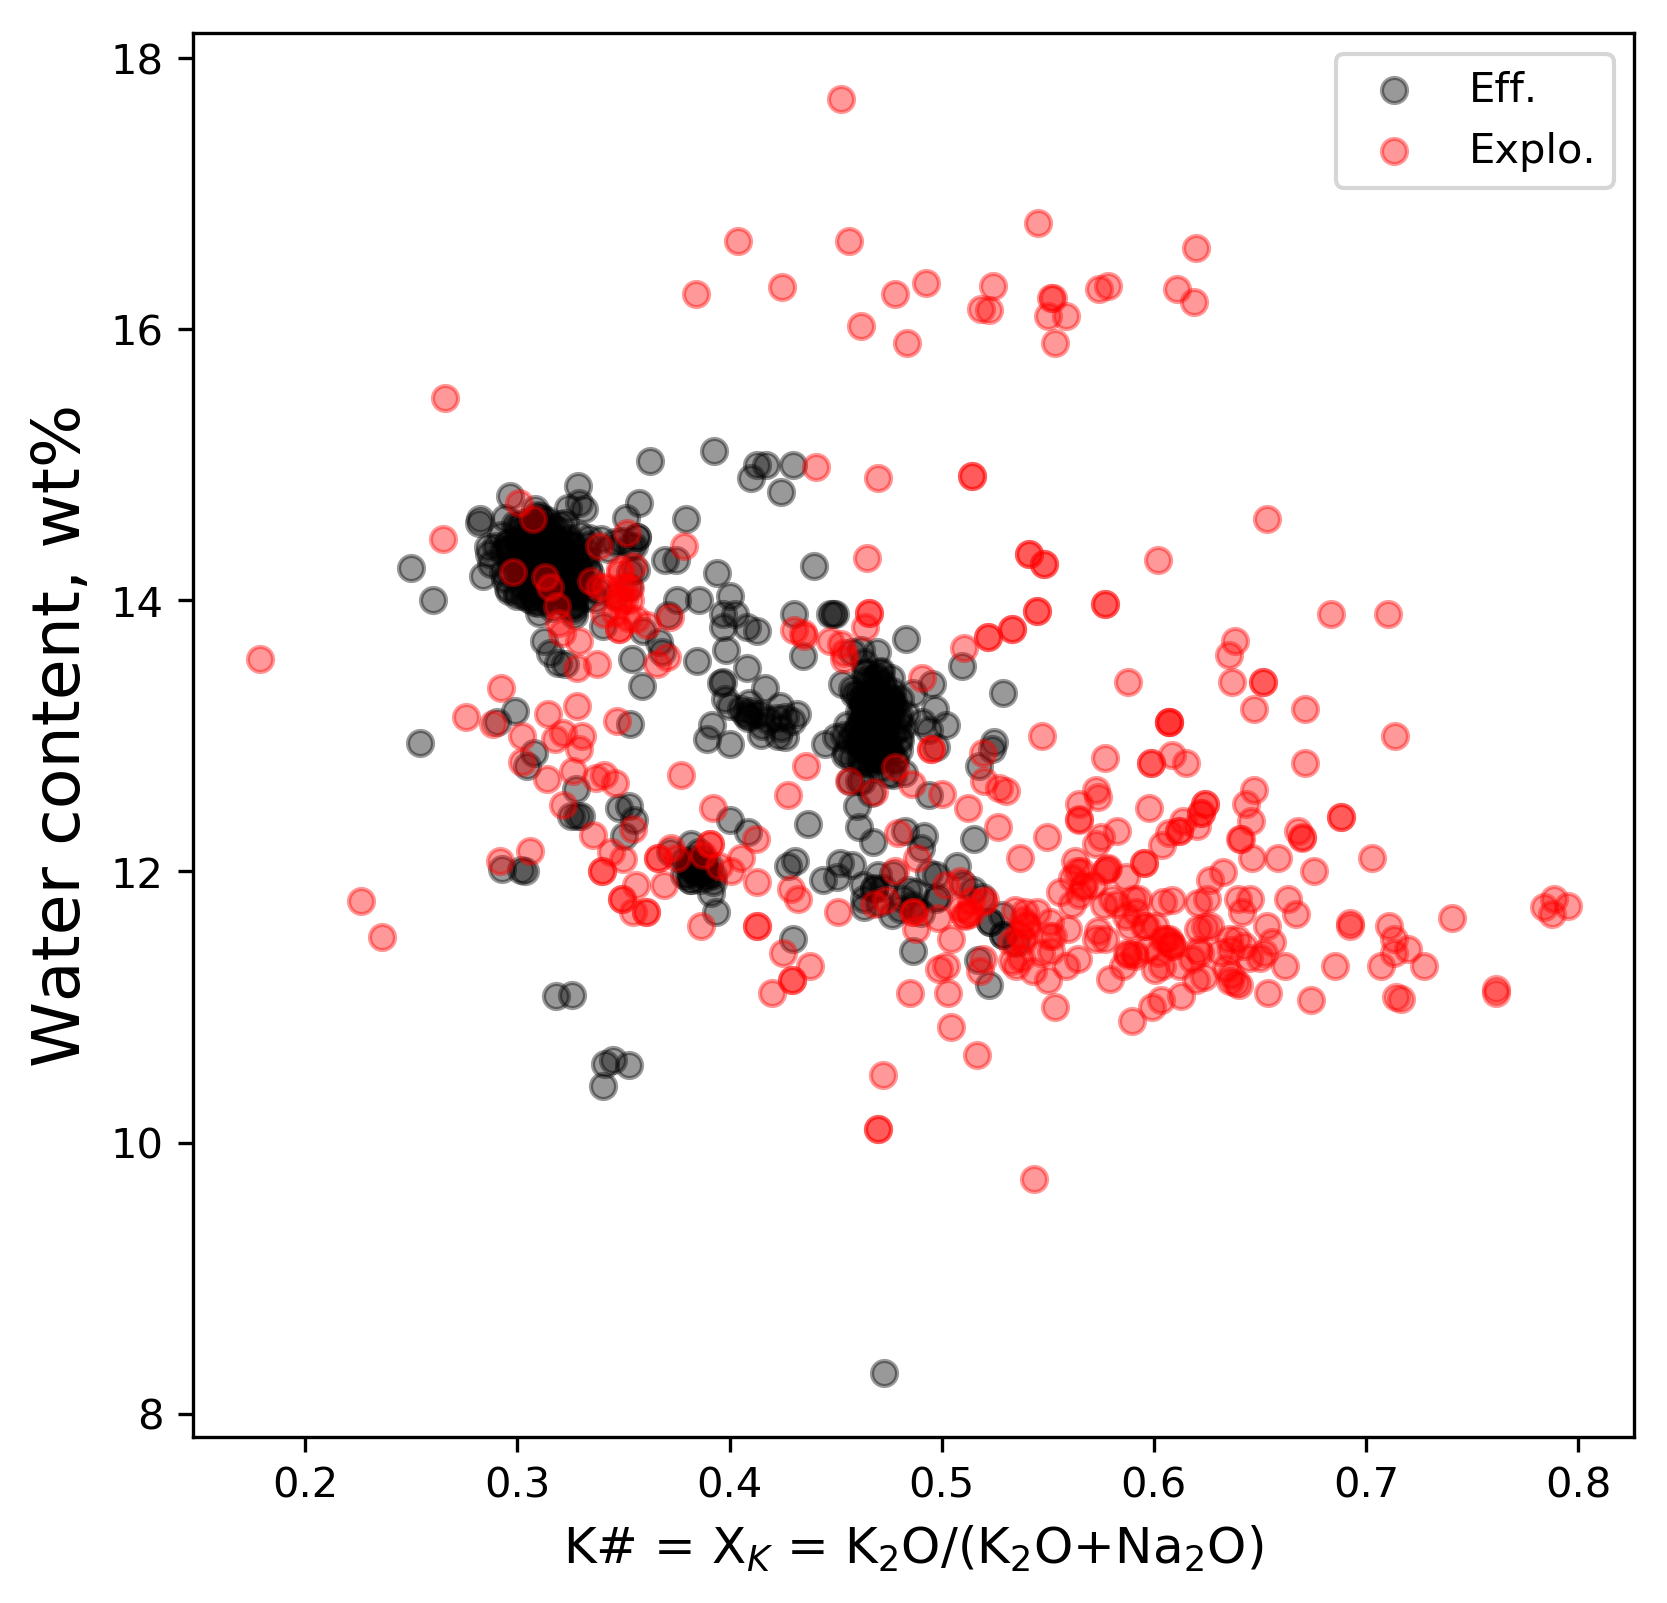

In [29]:
plt.figure(figsize=(6.2,6.2),dpi=300)
plt.scatter(dataset.loc[dataset["Explo"]==0,"K#"],np.abs(dataset.loc[dataset["Explo"]==0,"al2o3"]),c='k',alpha=0.4,label="Eff.")
plt.scatter(dataset.loc[dataset["Explo"]==1,"K#"],np.abs(dataset.loc[dataset["Explo"]==1,"al2o3"]),c='r',alpha=0.4,label="Explo.")
#plt.plot([0.43,0.43],[0,7],'k--')
plt.legend()
plt.xlabel(r"K# = X$_{K}$ = K$_2$O/(K$_2$O+Na$_2$O)",fontsize=12)
plt.ylabel(r"Water content, wt%",fontsize=16)
plt.savefig('water_XK.png')

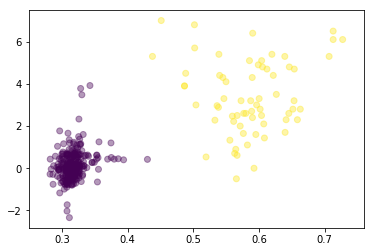

In [7]:
plt.scatter(dataset.loc[:,"K#"],dataset.loc[:,"h2o"],c=dataset.loc[:,"Explo"],alpha=0.4)

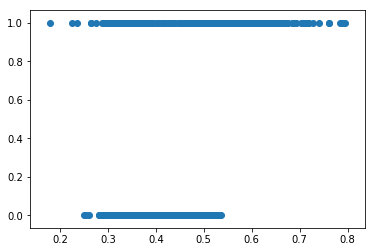

In [8]:
plt.scatter(dataset.loc[:,"K#"],dataset.loc[:,"Explo"]
           )

In [202]:
forML = dataset.iloc[:,3:22].dropna(axis=1)
explo_ml = forML["Explo"].copy()
forML = forML.drop(["Explo"],axis=1)
forML.head()


,sio2,al2o3,cao,na2o,k2o,sum,RAI
0,73.24,11.68,0.51,3.07,5.23,95.222,0.975732
1,75.73,11.91,0.44,3.35,5.30,98.382,0.983879
2,77.06,12.04,0.48,3.43,5.37,100.119,0.995929
3,77.02,11.99,0.46,3.53,5.24,99.924,0.999320
4,75.70,11.69,0.46,3.51,5.13,98.249,1.008486


# PCA

Text(0.5,1,'PCA result')

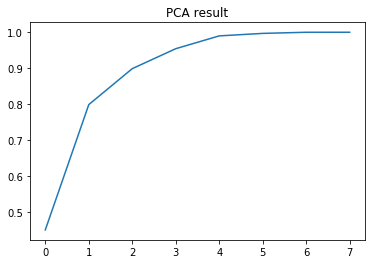

In [203]:
from sklearn.decomposition import PCA as PCA
pca = PCA()
pca.fit(FORPCA)
sum_pca = np.cumsum(pca.explained_variance_ratio_)
plt.plot(sum_pca)
plt.title("PCA result")

# KMeans

In [214]:
from sklearn.cluster import KMeans

# starting with two clusters
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(forML)

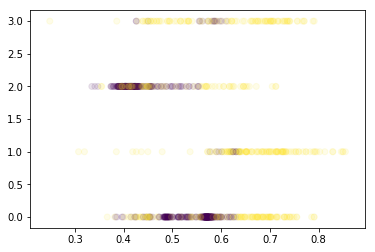

In [215]:
plt.scatter(forML["k2o"]/(forML["na2o"]+forML["k2o"]),y_pred,c=explo_ml,alpha=0.1)

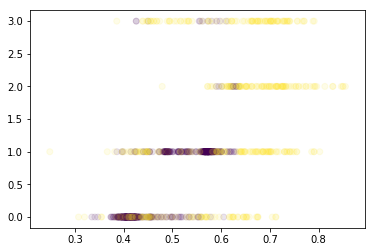

In [218]:
from sklearn.cluster import AgglomerativeClustering as AC

y_pred_ac = AC(n_clusters=4).fit_predict(forML)

plt.scatter(forML["k2o"]/(forML["na2o"]+forML["k2o"]),y_pred_ac,c=explo_ml,alpha=0.1)

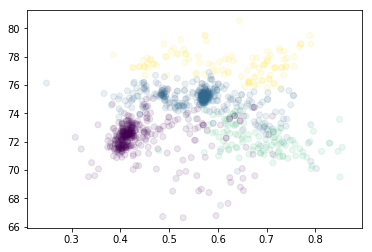

In [219]:
plt.scatter(forML["k2o"]/(forML["na2o"]+forML["k2o"]),forML["sio2"],c=y_pred_ac,alpha=0.1)

In [220]:
dataset3.head()

,Effusive,Location,Sample name,Explo,sio2,tio2,al2o3,feo,fe2o3,mno,...,f,cl,h2o,sum,RAI,K#,Reference,li2o,nio,xk
0,0,Scaup Lake,YCV08,0,0.829324,0.001363,0.077936,0.011553,0.0,0.000269,...,0.0,0.0,0.0,95.222,0.975732,0.528506,"Vazquez et al., 2009",0.0,0.0,0.630120
1,0,Mallard Lake,YCV15,0,0.829043,0.001227,0.076831,0.013001,0.0,0.000315,...,0.0,0.0,0.0,98.382,0.983879,0.510039,"Vazquez et al., 2009",0.0,0.0,0.612717
2,0,Dry Creek,YCV14,0,0.828985,0.001254,0.076324,0.013405,0.0,0.000319,...,0.0,0.0,0.0,100.119,0.995929,0.507420,"Vazquez et al., 2009",0.0,0.0,0.610227
3,0,Spring Creek,YCV07,0,0.829857,0.001127,0.076127,0.013156,0.0,0.000329,...,0.0,0.0,0.0,99.924,0.999320,0.494110,"Vazquez et al., 2009",0.0,0.0,0.597491
4,0,Grants Pass,YCV06,0,0.829469,0.001105,0.075481,0.014204,0.0,0.000343,...,0.0,0.0,0.0,98.249,1.008486,0.490227,"Vazquez et al., 2009",0.0,0.0,0.593750


In [6]:
dataset3 = vp.wt_mol(dataset3)
dataset3.head()

,Effusive,Location,Sample name,Explo,sio2,tio2,al2o3,feo,fe2o3,mno,...,p2o5,f,cl,h2o,sum,RAI,K#,Reference,li2o,nio
0,0,Scaup Lake,YCV08,0,0.829324,0.001363,0.077936,0.011553,0.0,0.000269,...,0.000067,0.0,0.0,0.0,95.222,0.975732,0.528506,"Vazquez et al., 2009",0.0,0.0
1,0,Mallard Lake,YCV15,0,0.829043,0.001227,0.076831,0.013001,0.0,0.000315,...,0.000042,0.0,0.0,0.0,98.382,0.983879,0.510039,"Vazquez et al., 2009",0.0,0.0
2,0,Dry Creek,YCV14,0,0.828985,0.001254,0.076324,0.013405,0.0,0.000319,...,0.000041,0.0,0.0,0.0,100.119,0.995929,0.507420,"Vazquez et al., 2009",0.0,0.0
3,0,Spring Creek,YCV07,0,0.829857,0.001127,0.076127,0.013156,0.0,0.000329,...,0.000041,0.0,0.0,0.0,99.924,0.999320,0.494110,"Vazquez et al., 2009",0.0,0.0
4,0,Grants Pass,YCV06,0,0.829469,0.001105,0.075481,0.014204,0.0,0.000343,...,0.000037,0.0,0.0,0.0,98.249,1.008486,0.490227,"Vazquez et al., 2009",0.0,0.0


In [12]:
dataset["xk"] = dataset["k2o"]/(dataset["k2o"]+dataset["na2o"])# wt%
dataset2["xk"] = dataset2["k2o"]/(dataset2["k2o"]+dataset2["na2o"])# wt%
dataset3["xk"] = dataset3["k2o"]/(dataset3["k2o"]+dataset3["na2o"])# mol%

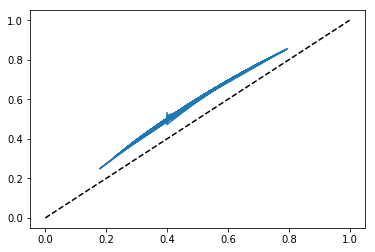

In [16]:
plt.plot(dataset["K#"],dataset3["xk"])

plt.plot([0,1],[0,1],"k--")